

# Project: TMDB movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> in this project i will be analysing The TMDB dataset which includes variety of movies up until 2015; i will be focusing on trends of the most popular movies in the list and compare them to find an appropiate answer 




In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline




<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:

md=pd.read_csv('tmdb-movies.csv')
md.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# checking the number of enetries to check null values 
md.shape

(10866, 21)

In [4]:
#checking null values
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
md.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
sum(md.duplicated())

1

In [7]:
md.drop_duplicates(inplace=True)

In [8]:
sum(md.duplicated())

0

In [9]:
md.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


## Dropping unnecessary columns i dont need the imdb_id since i already have an id, homepage isnt needed also since it is not used along with the director, taglines and keywords are similar, genres are more than efficient, production company and cast have null values.

In [10]:
# source https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe 
c=['imdb_id', 'homepage','director','tagline','overview','keywords','production_companies','cast']
md=md.drop(c, axis=1)

In [11]:
md.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [12]:
#no null values
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


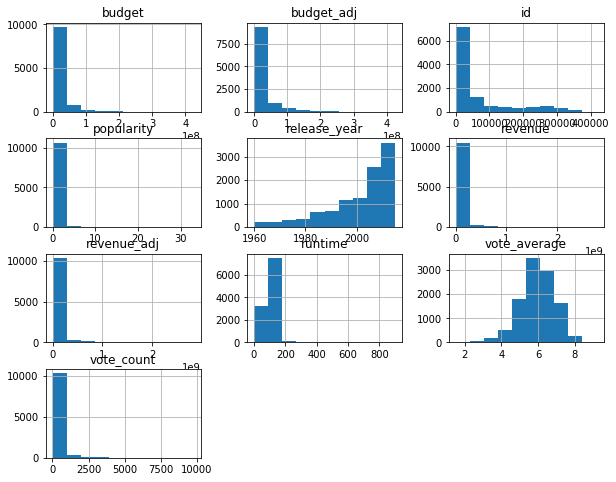

In [30]:
md.hist(figsize=(10, 8));

i just wanted to observe the dataset and check the plot, does not add any significant to the project

# since the dates are not in the same format i changed them 

In [14]:
# source https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas
md['release_date'] = pd.to_datetime(md['release_date'])

In [15]:
md.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


## replacing every 0 in the dataframe with the mean on the column

In [16]:
# replacing every 0 with the mean took it from https://stackoverflow.com/questions/55319655/pandas-how-to-replace-zero-values-in-a-column-with-the-mean-of-that-column-for
md=md.mask(md==0).fillna(md.mean())

<a id='eda'></a>
## Exploratory Data Analysis



### is the budget of the movie associated with the popularity?

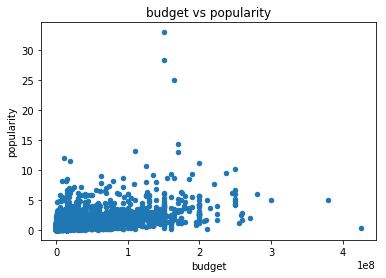

In [17]:
md.plot.scatter(x='budget',y='popularity', title='budget vs popularity')

From this plot i could tell that a high budget doesn't exactly mean that the movie is going to be popular, the values ranging from (0,2) from the budget isn't changing a lot in the popularity axis but when the budget is higher then i noticed a slight difference in the popularity of the movie

## in order to compare two different genres i decided to create 2 dataframs one for the action movies and the other for the horror movies.

In [18]:
# from the lessons in udacity
df_action=md[md['genres']=='Action']
df_action.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
25,177677,4.566713,1.500000e+08,6.823301e+08,Mission: Impossible - Rogue Nation,131.0,Action,2015-07-23,2349,7.1,2015,1.379999e+08,6.277435e+08
218,360055,0.633608,1.462429e+07,3.982690e+07,Riot,88.0,Action,2015-09-27,11,5.0,2015,1.754989e+07,5.136900e+07
250,318954,0.514735,1.462429e+07,1.236094e+06,Beyond the Mask,103.0,Action,2015-04-06,13,6.2,2015,1.754989e+07,1.137206e+06
257,321494,0.482422,1.462429e+07,3.982690e+07,The Man with the Iron Fists 2,90.0,Action,2015-03-10,43,4.7,2015,1.754989e+07,5.136900e+07
417,326284,0.248280,7.500000e+06,3.982690e+07,Pound of Flesh,104.0,Action,2015-05-07,42,5.4,2015,6.899997e+06,5.136900e+07


In [19]:
df_horror=md[md['genres']=='Horror']
df_horror.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
87,287424,1.980039,4.000000e+06,1.871120e+05,Maggie,95.0,Horror,2015-05-08,384,5.1,2015,3.679998e+06,1.721430e+05
98,283445,1.742286,1.000000e+07,5.288202e+07,Sinister 2,97.0,Horror,2015-08-19,331,5.5,2015,9.199996e+06,4.865144e+07
199,301846,0.707355,1.462429e+07,3.982690e+07,Howl,89.0,Horror,2015-10-01,62,4.9,2015,1.754989e+07,5.136900e+07
224,112454,0.599751,1.462429e+07,3.982690e+07,Clown,100.0,Horror,2015-03-02,182,5.2,2015,1.754989e+07,5.136900e+07
292,311539,0.423161,1.462429e+07,3.982690e+07,A Christmas Horror Story,99.0,Horror,2015-10-02,56,5.6,2015,1.754989e+07,5.136900e+07


In [20]:
mask=md['genres']=='Action'
df_action=md[mask]
df_action

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
25,177677,4.566713,1.500000e+08,6.823301e+08,Mission: Impossible - Rogue Nation,131.0,Action,2015-07-23,2349,7.1,2015,1.379999e+08,6.277435e+08
218,360055,0.633608,1.462429e+07,3.982690e+07,Riot,88.0,Action,2015-09-27,11,5.0,2015,1.754989e+07,5.136900e+07
250,318954,0.514735,1.462429e+07,1.236094e+06,Beyond the Mask,103.0,Action,2015-04-06,13,6.2,2015,1.754989e+07,1.137206e+06
257,321494,0.482422,1.462429e+07,3.982690e+07,The Man with the Iron Fists 2,90.0,Action,2015-03-10,43,4.7,2015,1.754989e+07,5.136900e+07
417,326284,0.248280,7.500000e+06,3.982690e+07,Pound of Flesh,104.0,Action,2015-05-07,42,5.4,2015,6.899997e+06,5.136900e+07
480,353610,0.270408,1.462429e+07,3.982690e+07,The Condemned 2,90.0,Action,2015-11-06,13,4.0,2015,1.754989e+07,5.136900e+07
597,332177,0.051107,1.462429e+07,3.982690e+07,Vendetta,90.0,Action,2015-06-12,22,5.9,2015,1.754989e+07,5.136900e+07
741,289720,1.312103,2.500000e+07,3.982690e+07,Outcast,98.0,Action,2014-09-26,87,4.4,2014,2.302728e+07,5.136900e+07
775,250066,0.954807,1.000000e+07,3.982690e+07,American Heist,94.0,Action,2014-09-11,116,4.3,2014,9.210911e+06,5.136900e+07
834,255268,0.678616,5.500000e+06,3.982690e+07,Bad Ass 2: Bad Asses,91.0,Action,2014-04-08,57,5.7,2014,5.066001e+06,5.136900e+07


In [21]:
maskk=md['genres']=='Horror'
df_horror=md[maskk]
df_horror

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
87,287424,1.980039,4.000000e+06,1.871120e+05,Maggie,95.00000,Horror,2015-05-08,384,5.1,2015,3.679998e+06,1.721430e+05
98,283445,1.742286,1.000000e+07,5.288202e+07,Sinister 2,97.00000,Horror,2015-08-19,331,5.5,2015,9.199996e+06,4.865144e+07
199,301846,0.707355,1.462429e+07,3.982690e+07,Howl,89.00000,Horror,2015-10-01,62,4.9,2015,1.754989e+07,5.136900e+07
224,112454,0.599751,1.462429e+07,3.982690e+07,Clown,100.00000,Horror,2015-03-02,182,5.2,2015,1.754989e+07,5.136900e+07
292,311539,0.423161,1.462429e+07,3.982690e+07,A Christmas Horror Story,99.00000,Horror,2015-10-02,56,5.6,2015,1.754989e+07,5.136900e+07
310,306964,0.393642,1.462429e+07,3.982690e+07,Tales of Halloween,90.00000,Horror,2015-10-16,74,5.3,2015,1.754989e+07,5.136900e+07
313,94365,0.386529,1.462429e+07,3.982690e+07,The Human Centipede 3 (Final Sequence),103.00000,Horror,2015-05-22,75,3.5,2015,1.754989e+07,5.136900e+07
316,291272,0.382997,1.462429e+07,3.982690e+07,We Are Still Here,84.00000,Horror,2015-06-05,91,5.5,2015,1.754989e+07,5.136900e+07
366,299551,0.322640,1.462429e+07,3.982690e+07,The Atticus Institute,92.00000,Horror,2015-01-20,92,5.3,2015,1.754989e+07,5.136900e+07
385,157422,0.292437,1.462429e+07,3.982690e+07,The Wicked Within,91.00000,Horror,2015-10-16,17,4.1,2015,1.754989e+07,5.136900e+07


## this plot shows that horror movies are more popular

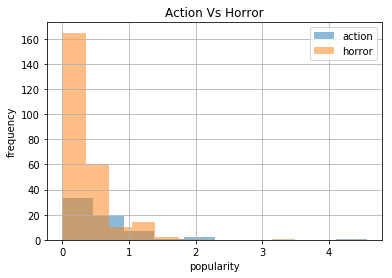

In [34]:
df_action.popularity.hist(label='action', alpha=0.5)
df_horror.popularity.hist(label='horror', alpha=0.5)
plt.legend();
plt.xlabel('popularity');
plt.ylabel('frequency');
plt.title('Action Vs Horror');

This plot will show the difference in popularity between these two genres. 
since the popularity value ranges from {0, some number} this plot still shows that the popularity of horror movies is larges than action movies  

## different questions on the single coulmns

what the most popular movie in this list?

In [35]:
# source https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
md.loc[md['popularity'].idxmax()]


id                                                   135397
popularity                                          32.9858
budget                                              1.5e+08
revenue                                         1.51353e+09
original_title                               Jurassic World
runtime                                                 124
genres            Action|Adventure|Science Fiction|Thriller
release_date                            2015-06-09 00:00:00
vote_count                                             5562
vote_average                                            6.5
release_year                                           2015
budget_adj                                         1.38e+08
revenue_adj                                     1.39245e+09
Name: 0, dtype: object

### what is the highest rated movie in this list  

In [36]:
#source https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
md.loc[md['vote_average'].idxmax()]


id                                       125336
popularity                             0.006925
budget                              1.46243e+07
revenue                             3.98269e+07
original_title    The Story of Film: An Odyssey
runtime                                     900
genres                              Documentary
release_date                2011-09-03 00:00:00
vote_count                                   14
vote_average                                9.2
release_year                               2011
budget_adj                          1.75499e+07
revenue_adj                          5.1369e+07
Name: 3894, dtype: object

# what is the longest runtime

In [ ]:
#source https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
md.loc[md['runtime'].idxmax()]


<a id='conclusions'></a>
## Conclusions

> In this project i discovered that a higher budget doesn't necessarily mean the movie is going to be popular. the popularity of the movie also depends on the genre of the movie, where i discovered that horror movies are more popular than action movies. through certain functions i was able to discover which is the most popular movie, longest runtime and the highest rate. 
> ## Limitations 
 The dataset didn't have an age rating for the movies, that could've been helpful. and Having many values in the Genres coulmn made it difficult for me to graph the most popular movie genres since i am a beginner at data analysis.
my skills are not that good as an analyst where i could've analysed the dataset more, and i think my questions were not related maybe. i could've connected the questions of a single varible with other questions to give an overall analysis. I tried to ask questions and not be biased about the most popular genres but i chose to copmare between two genres like the action movies and horror movies becouse of my lack of expierence dealing with datasets





In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])